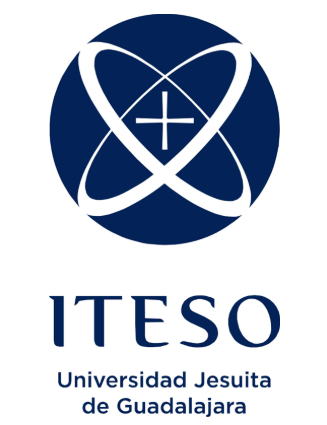

# Proyecto de Simulación Financiera

### Integrantes:
- Sofía Vázquez Guerrero - 739167 - sofia.vazquezg@iteso.mx
- Diego Ruíz González - 739792 - diego.ruiz@iteso.mx
- Michelle Goméz Lopéz - 741902 - michelle.gomez@iteso.mx

### Fecha:
- 06 de marzo del 2023

### Maestro:
- Gabriel Alejandro Morales Ruíz

### Tema:
- Programación Lineal, optimización de portafolios.

## Título del proyecto

### Portafolios de inversión 

Se le llama portafolio de inversión al conjunto de activos que seleccionas, como instrumentos de renta fija, variable o mixta como bonos, acciones, monedas, efectivo, productos derivados, materias primas, entre otros activos financieros que pertenecen a un inversionista. Esta es una herramienta cuyo objetivo es diversificar tus ingresos a través de la inversión en diferentes activos. 

Al momento de armar un portafolio o cartera de inversión, se debe de considerar distintos aspectos que giran en torno a tu estrategia de inversión.

Nuestro proyecto consiste en la creación de un portafolio de inversión el cual cumpla con las expectativas del inversionista y minimice el riesgo en él; esto con el objetivo de no sacrificar el riesgo de la cartera ni su retorno. El código que nosotros creamos te arroja el retorno, la volatilidad y la varianza, así como la cantidad que se debe de invertir para así maximizar el retorno. 

## Objetivos

### Objetivo general

El objetivo de este proyecto es demostrar nuestros conocimientos y aplicarlos en la realización de un programa que nos ayude a crear un portafolio de inversión; que es una selección de activos, los cuales varían en instrumentos de renta fija, variable o mixta, como : bonos, acciones, monedas, efectivo, materias primas y productos derivados. Los portafolios deben considerar diferentes características, como lo son, el perfil de riesgo, la rentabilidad del instrumento  y el tiempo esperado. En este proyecto, nos enfocaremos en acciones como nuestro instrumento .

### Objetivos específicos

Así como se mencionó en el objetivo general, nuestro instrumento serán las acciones. Primero que nada, se eligen las acciones con las que se va a trabajar y se define la fecha inicial. Teniendo esto, podemos obtener el precio de las acciones para así graficar y verlas visualmente. Sin embargo, lo importante no es el precio, sino el retorno como su volatilidad. 


Después generamos un portafolio arbitrario, el cual le asigna el precio a cada activo para así poder obtener la varianza, la volatilidad y el retorno. Una vez arrojados estos resultados, podemos calcular la cantidad. invertir en cada acción.

## Modelo que representa el problema y planteamiento

**Criterio de optimización:**

Queremos ver la mejor estrategia para invertir en 5 acciones. Sacar la máxima cantidad que puede ser invertida en cada acción con restricciones.

**Función a optimizar:**

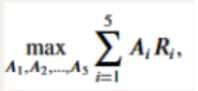

**Variables:**
- A= Cantidad Invertida 
- R= Retorno

**Otras Funciones:**

Retorno
- Ri= ln(VF/VP)


Varianza
- σ^2 = W^T * ∑W


W= Pesos de los activos
- ∑W= Matriz de covarianza


Volatilidad
- σ=√σ^2

**Restricciones:**
- Tenemos un capital total de $1,000,000
- Debemos invertir el 25% en cada acción
- Podemos invertir el 50% en acciones con rendimiento mayor al 0.9%
- Podemos invertir el 35% en acciones con rendimiento menor a 0.6%
$$ 0.1 x_a + 0.1 x_b \geq 30 $$
- $$A1+A2+A3+A4+A5\leq1,000,000$$
- $$A1\leq250,000$$
- $$A2\leq250,000$$
- $$A3\leq250,000$$
- $$A4\leq250,000$$
- $$A5\leq250,000$$
- $$A3+A4\leq500,000$$
- $$A1+A2+A5\leq350,000$$

## Solución y visualización

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import scipy.optimize as opt
import pandas as pd

In [74]:
data = "Acciones (1).xlsx"

In [75]:
precios = pd.read_excel(data, index_col=0, header=[0])
precios

,MSFT,AMZN,META,TSLA,AAPL
2022-12-01,238.65,87.57,119.70,122.68,129.82
2022-11-01,255.09,100.66,110.75,169.23,147.97
2022-10-01,242.42,106.51,98.69,210.75,154.81
2022-09-01,264.38,113.50,135.52,275.42,138.16
2022-08-01,291.85,143.55,161.24,289.43,163.19
2022-07-01,267.65,134.92,158.46,272.30,162.49
2022-06-01,247.20,115.99,170.28,234.92,141.62
2022-05-01,252.07,112.93,194.60,208.44,149.52
2022-04-01,279.75,124.34,200.16,334.08,157.69
2022-03-01,279.48,161.08,221.01,306.05,174.61


In [76]:
tickers = precios.columns.values
tickers

array(['MSFT', 'AMZN', 'META', 'TSLA', 'AAPL'], dtype=object)

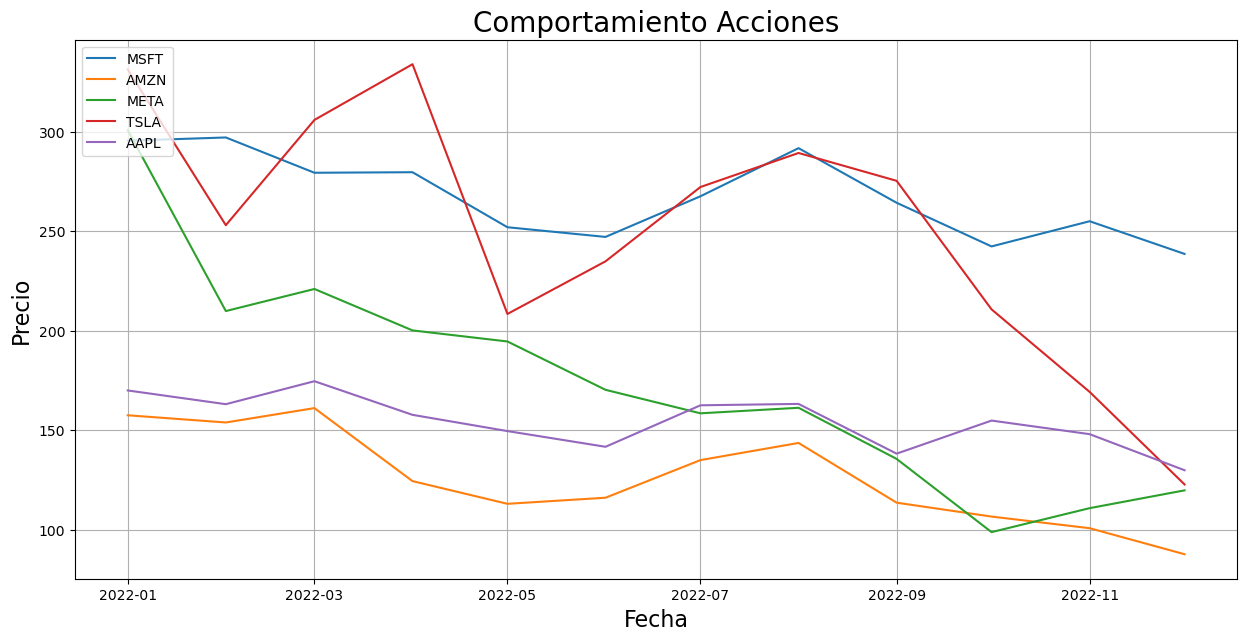

In [77]:
plt.figure(figsize=(15,7))
for i in precios.columns.values:
    plt.plot( precios[i],  label=i)
plt.title('Comportamiento Acciones', fontsize=20)
plt.xlabel('Fecha', fontsize=16)
plt.ylabel('Precio', fontsize=16)
plt.legend(precios.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

In [78]:
Retorno = np.log(precios).diff()
Retorno = Retorno.dropna()
Retorno

,MSFT,AMZN,META,TSLA,AAPL
2022-11-01,0.066618,0.139310,-0.077713,0.321679,0.130861
2022-10-01,-0.050945,0.056490,-0.115292,0.219414,0.045189
2022-09-01,0.086716,0.063564,0.317136,0.267625,-0.113786
2022-08-01,0.098853,0.234881,0.173775,0.049616,0.166503
2022-07-01,-0.086560,-0.062001,-0.017392,-0.061009,-0.004299
2022-06-01,-0.079482,-0.151178,0.071942,-0.147659,-0.137469
2022-05-01,0.019509,-0.026736,0.133502,-0.119594,0.054283
2022-04-01,0.104190,0.096252,0.028171,0.471729,0.053201
2022-03-01,-0.000966,0.258881,0.099091,-0.087632,0.101924
2022-02-01,0.061576,-0.045923,-0.051577,-0.190003,-0.068498


In [79]:
MSFT_S = Retorno['MSFT'].sum()
AMZN_S = Retorno['AMZN'].sum()
META_S = Retorno['META'].sum()
TSLA_S = Retorno['TSLA'].sum()
AAPL_S = Retorno['AAPL'].sum()

In [95]:
AAPL_S

0.2694142396412884

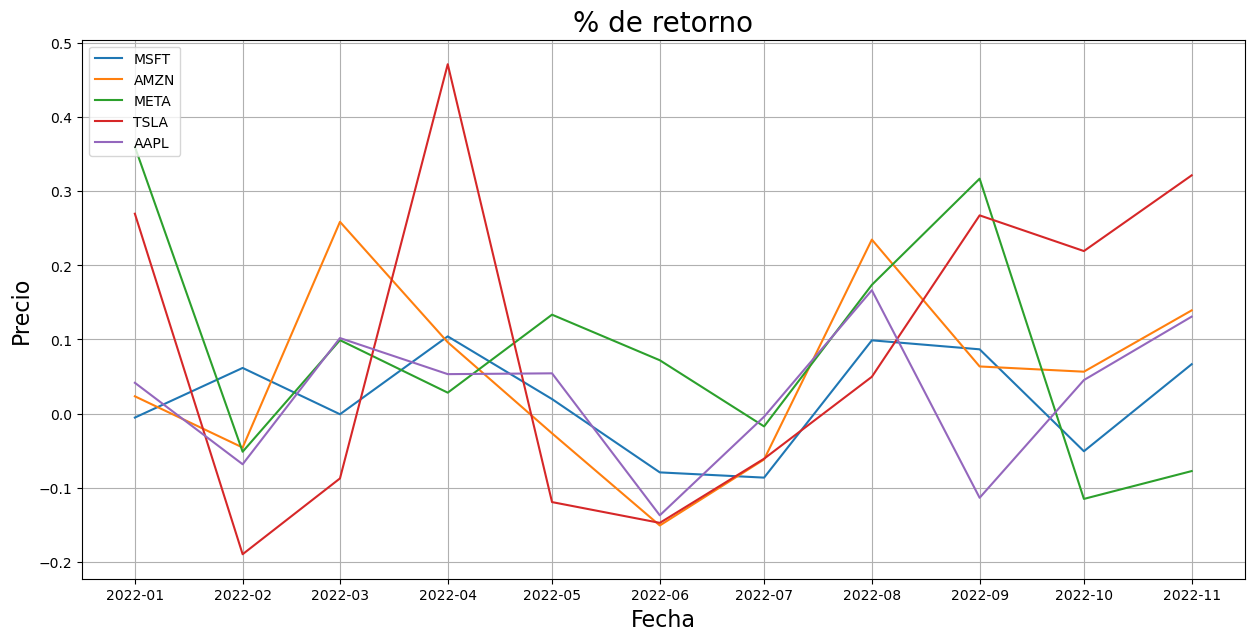

In [81]:
plt.figure(figsize=(15,7))
for i in Retorno.columns.values:
    plt.plot( Retorno[i],  label=i)
plt.title('% de retorno', fontsize=20)
plt.xlabel('Fecha', fontsize=16)
plt.ylabel('Precio', fontsize=16)
plt.legend(Retorno.columns.values, loc='upper left')
plt.grid()
plt.savefig('plot%retorno.png', dpi=300, bbox_inches='tight')
plt.show()

In [82]:
Retorno_activos = Retorno.loc[:, Retorno.columns != '^IXIC']
Retorno_activos

,MSFT,AMZN,META,TSLA,AAPL
2022-11-01,0.066618,0.139310,-0.077713,0.321679,0.130861
2022-10-01,-0.050945,0.056490,-0.115292,0.219414,0.045189
2022-09-01,0.086716,0.063564,0.317136,0.267625,-0.113786
2022-08-01,0.098853,0.234881,0.173775,0.049616,0.166503
2022-07-01,-0.086560,-0.062001,-0.017392,-0.061009,-0.004299
2022-06-01,-0.079482,-0.151178,0.071942,-0.147659,-0.137469
2022-05-01,0.019509,-0.026736,0.133502,-0.119594,0.054283
2022-04-01,0.104190,0.096252,0.028171,0.471729,0.053201
2022-03-01,-0.000966,0.258881,0.099091,-0.087632,0.101924
2022-02-01,0.061576,-0.045923,-0.051577,-0.190003,-0.068498


In [83]:
def PesosP(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal
pesos = PesosP(Retorno_activos)
pesos

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [84]:
covarianza = Retorno_activos.cov()*252

In [85]:
varianza_portafolio = pesos.T @ covarianza @pesos
"La varianza del portafolio es:" + " " + str(round(varianza_portafolio,4))+"%"

'La varianza del portafolio es: 1.9979%'

In [86]:
volatilidad= np.sqrt(varianza_portafolio)
"La volatilidad del portafolio es:" + " " + str(round(volatilidad,4))+"%"

'La volatilidad del portafolio es: 1.4135%'

In [87]:
Rendimiento= (((1 + MSFT_S) * (1 + AMZN_S) * (1 + META_S) *(1 + TSLA_S) *(1 + AAPL_S) - 1))
"El rendimiento del portafolio es: "+ str(round(Rendimiento,4)) +"%"

'El rendimiento del portafolio es: 8.3718%'

In [113]:
import scipy.optimize as opt
import numpy as np

c = np.array([-1.2140,
              -1.5867,
              -1.9219,
              -1.9940,
              -1.2694,
             ])

Aub = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [-1, -1, 0, 0, -1],
    [0, 0, 1, 1, 0],
 ])
Bub = np.array([1000000,
                250000,
                250000,
                250000,
                250000,
                250000,
                500000,
                350000
               ])

In [114]:
opt.linprog(c, Aub, Bub)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -1586815.0
       ineqlin:  marginals: array([-1.214 , -0.    , -0.3727, -0.    , -0.0721, -0.0554, -0.    ,
       -0.7079])
  residual: array([      0.,  100000.,       0.,  150000.,       0.,       0.,
       1150000.,       0.])
         lower:  marginals: array([0., 0., 0., 0., 0.])
  residual: array([150000., 250000., 100000., 250000., 250000.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 2
         slack: array([      0.,  100000.,       0.,  150000.,       0.,       0.,
       1150000.,       0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0., 0.])
  residual: array([inf, inf, inf, inf, inf])
             x: array([150000., 250000., 100000., 250000., 250000.])

In [116]:
"Tenemos que invertir $150,000 en MSTF, $250,000 en AMZN, $100,000 en META, $250,000 en TSLA y $250,000 en AAPLE para obtener  el maximo rendimiento."


'Tenemos que invertir $150,000 en MSTF, $250,000 en AMZN, $100,000 en META, $250,000 en TSLA y $250,000 en AAPLE para obtener  el maximo rendimiento.'

## Conclusiones

En conclusión, cumplimos con los objetivos esperados, ya que pudimos calcular el retorno, la volatilidad y la varianza de las acciones seleccionadas. Observando los resultados, podemos minimizar el riesgo, ya que puedes darte cuenta de que tan riesgosas son los activos seleccionados,  y es en este punto cuando el inversionista puede tomar la decisión de utilizar estas acciones o cambiarlas. 

Enfocándonos en los activos que nosotros seleccionamos, podemos deducir que se trata de una volatilidad media, que se refiere a fluctuaciones de precios moderados en un activo, generalmente en un rango de +/- 1-3% en un día típico. Los activos con volatilidad media son considerados como una opción equilibrada por los inversores, ya que ofrecen un cierto potencial de ganancias y riesgo moderado. Así mismo, pudimos obtener la cantidad exacta a invertir en cada acción.

## Referencias

- Staff, F. (2022, 18 febrero). Qué es un portafolio de inversión y cómo armar uno. Forbes México. https://www.forbes.com.mx/que-es-un-portafolio-de-inversion-y-como-armar-uno/
- Jsanchezalmaraz (2020) ¿Por qué usar rendimientos logarítmicos? ⋆ Quantdare, Quantdare. Available at: https://quantdare.com/por-que-usar-rendimientos-logaritmicos/
- Meza, M. (2022). Qué es un portafolio de inversión y cómo armar uno. Retrieved 5 March 2023, from https://www.forbes.com.mx/que-es-un-portafolio-de-inversion-y-como-armar-uno/
- Portafolio de inversión. (2022), from https://gbm.com/academy/que-es-un-portafolio-de-inversion-conoce-sus-tipos-y-pasos-para-crearlo/
- Investing.com México - Finanzas, Bolsa y Forex. (s. f.). Investing.com México. https://mx.investing.com/